In [4]:
import pandas as pd
df= pd.read_csv("Major Project Dataset (Wine Classification).csv", encoding='latin-1')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [24]:
df[df['total sulfur dioxide'].isna() | df['pH'].isna() | df['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [25]:
df.dropna(inplace = True)

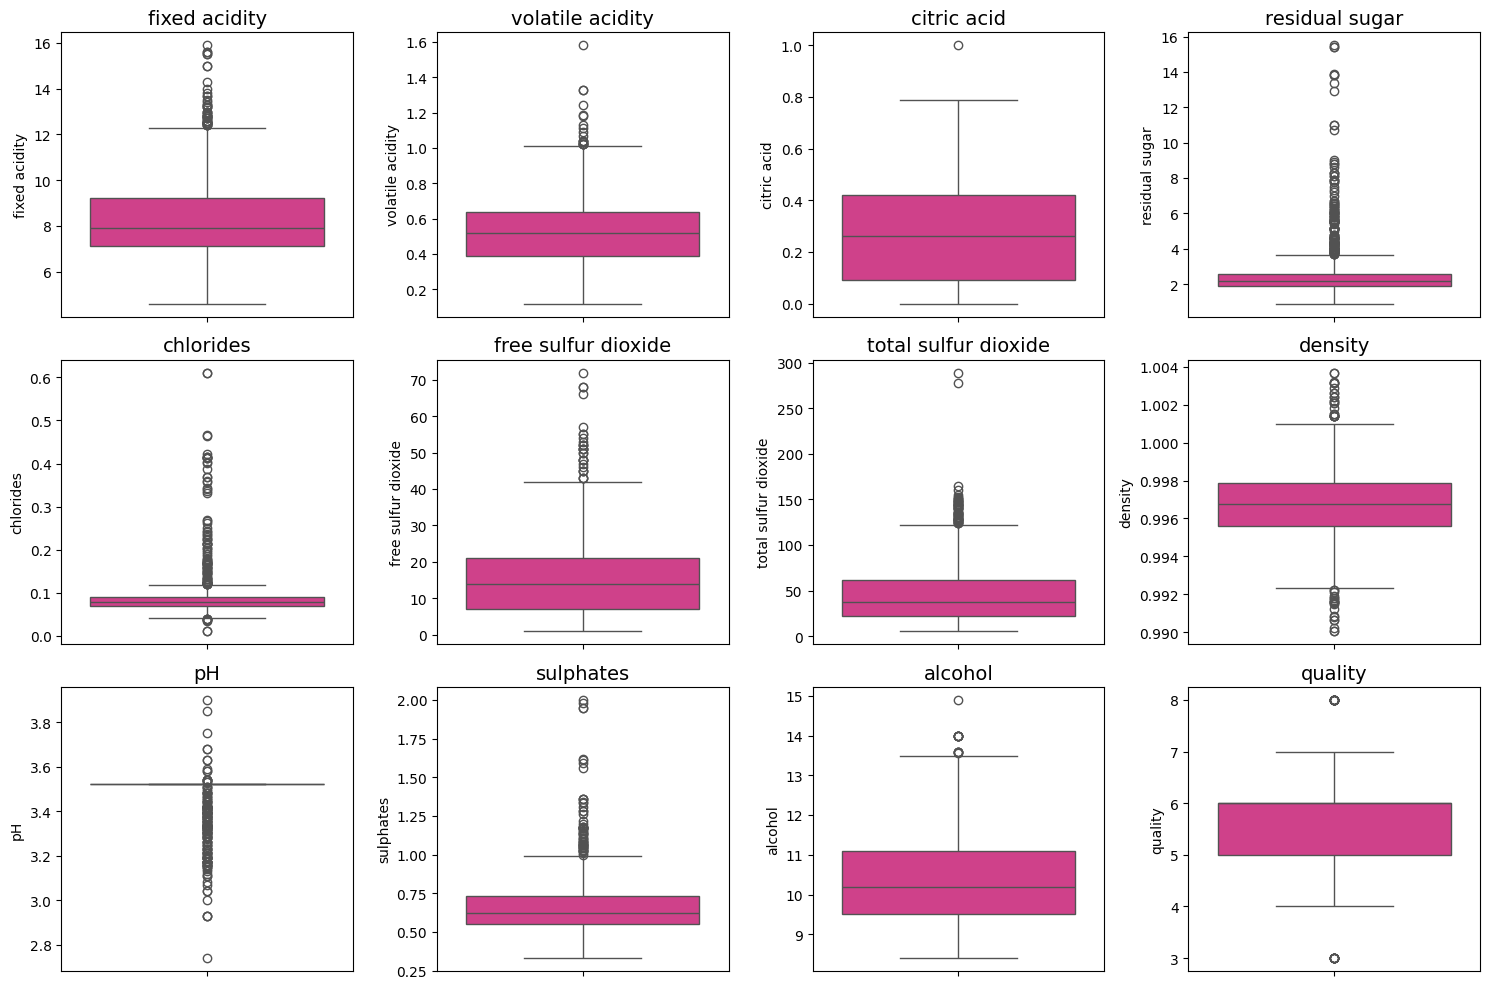

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[column], color ='#e7298a')
    plt.title(column, fontsize=14)
    plt.xlabel("")
plt.tight_layout()
plt.show()

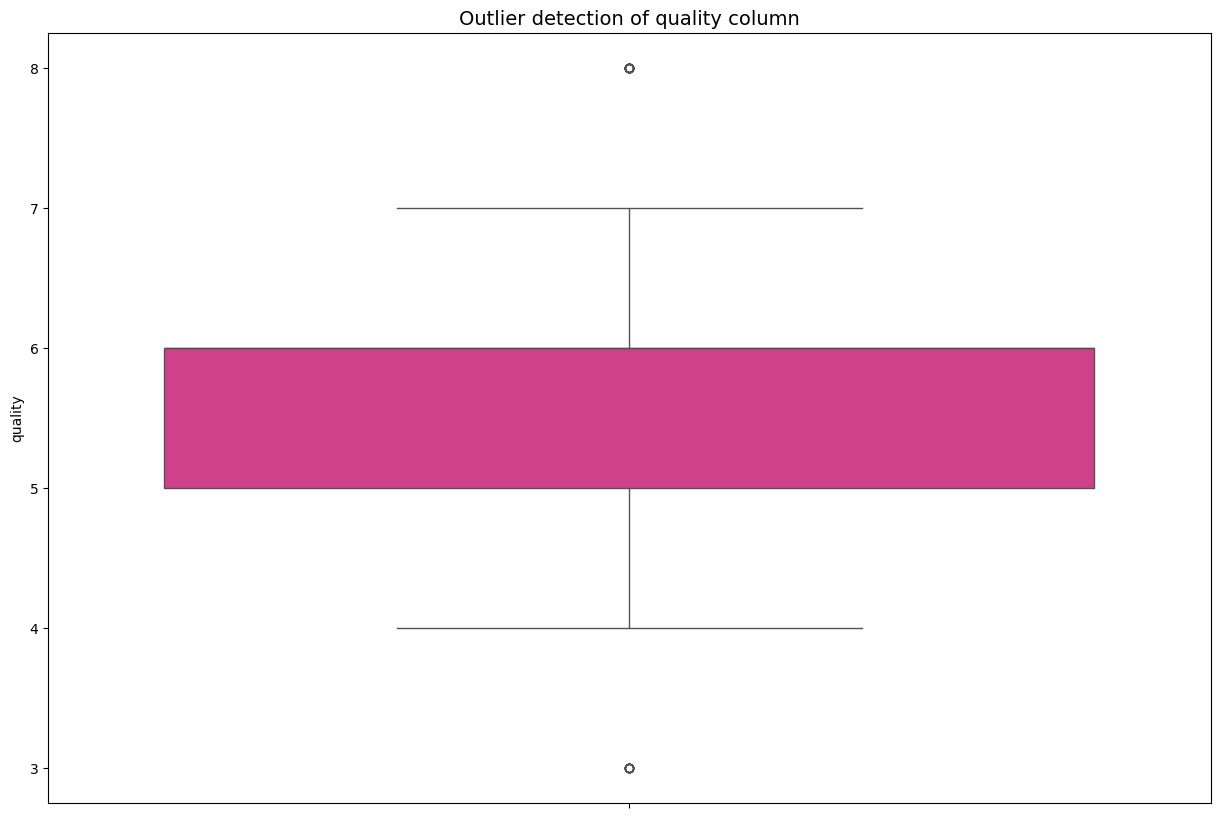

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df['quality']
 
plt.figure(figsize =(15, 10))
sns.boxplot(y=data, color ='#e7298a')
plt.title("Outlier detection of quality column", fontsize=14)
plt.xlabel("")

# show plot
plt.show()

<h3>MACHINE LEARNING MODEL USING LINEAR REGRESSION</h3>

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

#feature columns and target columns
features = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
target = df['quality']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1276, 11)
(320, 11)
(1276,)
(320,)


In [43]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [45]:
y_pred = model.predict(x_test)

In [46]:
metrics(y_test, y_test)

RMSE: 0.0
R_Squared value: 1.0


In [47]:
accuracy(y_test, y_pred)

90.5752628997575

In [48]:
y_pred

array([5.73590265, 5.85030339, 5.29467602, 5.56872508, 5.52389924,
       5.32532757, 5.30511318, 5.96247286, 6.07523463, 5.58018773,
       5.4138166 , 5.3490287 , 5.12678558, 5.21458613, 5.63068731,
       5.36881427, 5.35462281, 5.44579259, 5.09091194, 5.33509769,
       5.54414843, 6.22903618, 6.01319684, 5.29417631, 5.07941196,
       5.12769878, 6.15212255, 6.01701491, 5.25181954, 6.23784983,
       6.25068155, 5.09503561, 5.82671155, 5.50625016, 6.0802362 ,
       5.20959074, 5.36243344, 5.46524945, 5.43575954, 4.95769684,
       6.10802087, 5.45159491, 5.59684455, 5.13191138, 5.8641166 ,
       5.38575454, 5.14066526, 5.38114748, 4.36161105, 6.1849637 ,
       5.55184294, 5.62219809, 4.86039741, 6.91168708, 5.77082075,
       4.98993888, 6.48434004, 4.88698121, 5.13037481, 5.37944726,
       5.2703451 , 5.34050213, 5.16984655, 5.43708946, 5.26664594,
       5.06203879, 5.79767232, 5.77718557, 6.12752532, 5.93302363,
       5.68472214, 5.843775  , 6.19704068, 6.16784727, 5.35902